<a href="https://colab.research.google.com/github/isurushanaka/AII_Course-1/blob/main/Clustering/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans                   # K-Means Clustering
from sklearn.cluster import AgglomerativeClustering  # Hierarchical Clustering
from sklearn.cluster import DBSCAN                   # DBSCAN Clustering

from sklearn import datasets
from sklearn.metrics import silhouette_score

#### Iris Dataset: This dataset contains measurements of different features of iris flowers

In [2]:
# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

n_clusters=len(np.unique(y))  # Set the number of clusters equal to number of classes
n_clusters

3

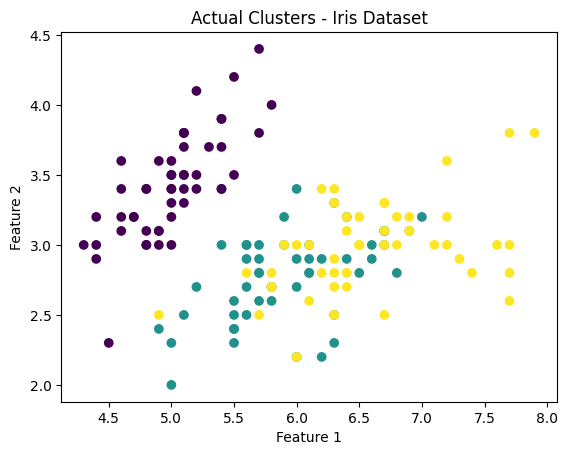

In [3]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title(f'Actual Clusters - Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 1. K-Means Clustering

![K-means](https://miro.medium.com/v2/resize:fit:828/1*oj1MBxiPfnyeQC3HnCcJiw.gif)

In [4]:
kmeans = KMeans(n_clusters=3)

In [5]:
kmeans.fit(X)
labels_kmeans = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### silhouette score
1. The silhouette score is a metric used to evaluate the quality of clustering results.
2. It measures how well samples within the same cluster are similar to each other compared to samples in other clusters.
3. The silhouette score ranges from -1 to 1, where a higher value indicates better clustering.
4. The silhouette score is calculated for each sample in the dataset and is the difference between the mean distance to the samples in the same cluster (a) and the mean distance to the samples in the nearest neighboring cluster (b), divided by the maximum of the two.

silhouette_score(i) = (b - a) / max(a, b)

5. The overall silhouette score for a clustering result is the average silhouette score across all samples in the dataset.
6. It provides an indication of the compactness and separation of the clusters.
7. A silhouette score close to 1 indicates well-separated clusters, a score around 0 indicates overlapping clusters, and a negative score suggests incorrect clustering.

In [6]:
# Evaluate the clustering model
silhouette_kmeans = silhouette_score(X, labels_kmeans)
print(silhouette_kmeans)

0.5528190123564095


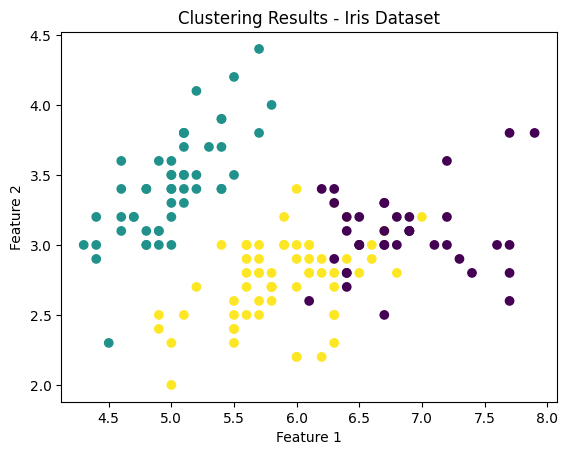

In [10]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
plt.title(f'Clustering Results - Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 2. Hierarchical Clustering

![Hierarchical Cluster](https://miro.medium.com/v2/resize:fit:480/0*BfO2YN_BSxThfUoo.gif)

![Hierarchical Cluster](https://miro.medium.com/v2/resize:fit:257/0*iozEcRXXWXbDMrdG.gif)

In [11]:
agg = AgglomerativeClustering(n_clusters=3)

In [12]:
agg.fit(X)
labels_agg = agg.labels_

In [13]:
# Evaluate the clustering model
silhouette_agg = silhouette_score(X, labels_agg)
print(silhouette_agg)

0.5543236611296419


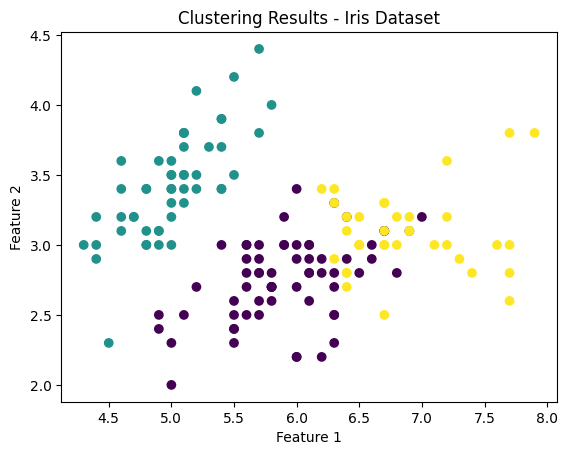

In [14]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='viridis')
plt.title(f'Clustering Results - Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 3. DBSCAN Clustering

1. DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.
2. It groups 'densely grouped' data points into a single cluster.
3. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

![dbscan](https://miro.medium.com/v2/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

In [15]:
dbscan = DBSCAN(eps=0.6, min_samples=10)

In [16]:
dbscan.fit(X)
labels_dbscan = dbscan.labels_

In [17]:
# Evaluate the clustering model
silhouette_dbscan = silhouette_score(X, labels_dbscan)
print(silhouette_dbscan)

0.5421203936716451


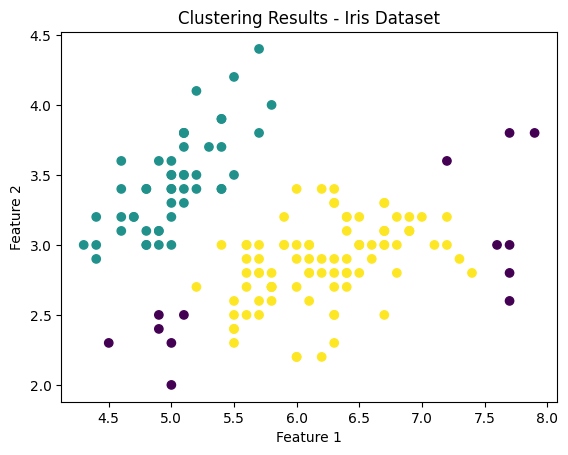

In [18]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis')
plt.title(f'Clustering Results - Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##### Wine Dataset: The wine dataset consists of chemical analysis results of different wines.

In [19]:
# Load the dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

n_clusters=len(np.unique(y))  # Set the number of clusters equal to number of classes
n_clusters

3

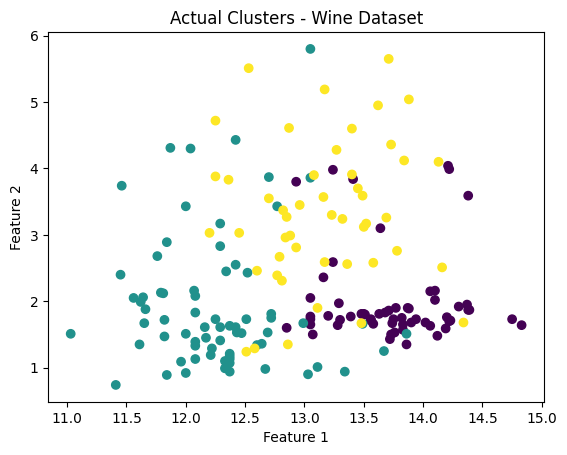

In [23]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title(f'Actual Clusters - Wine Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=n_clusters)
agg = AgglomerativeClustering(n_clusters=n_clusters)
dbscan = DBSCAN(eps=0.1, min_samples=1)

In [25]:
kmeans.fit(X)
agg.fit(X)
dbscan.fit(X)

labels_kmeans = kmeans.labels_
labels_agg = agg.labels_
labels_dbscan = dbscan.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
# Evaluate the clustering model
silhouette_kmeans = silhouette_score(X, labels_kmeans)
silhouette_agg = silhouette_score(X, labels_agg)
# silhouette_dbscan = silhouette_score(X, labels_dbscan)

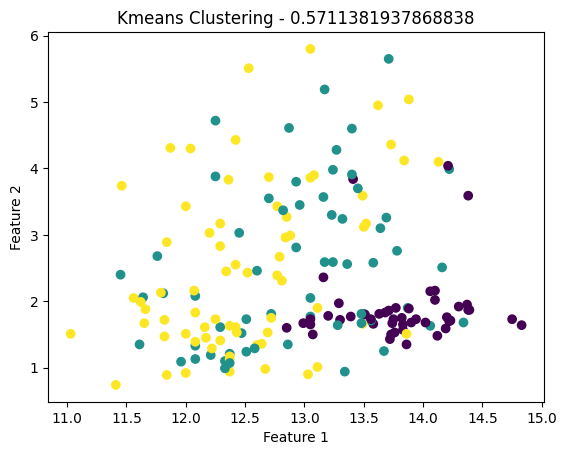

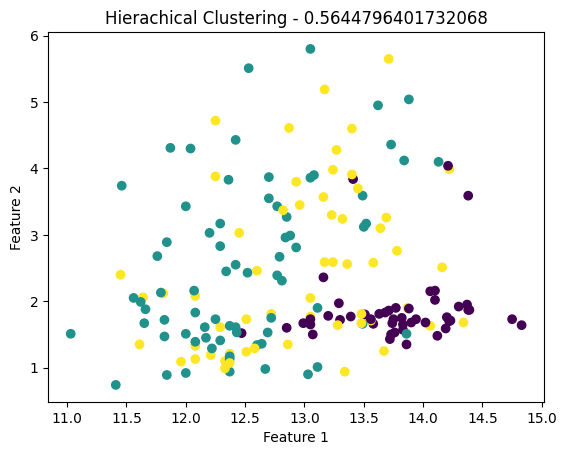

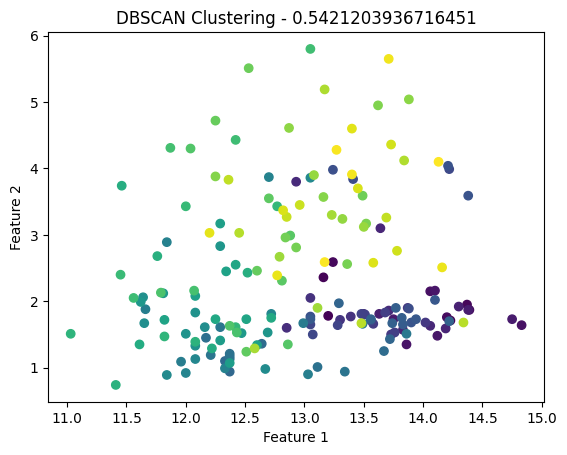

In [27]:
# Plot the clusters - kmeans
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
plt.title(f'Kmeans Clustering - {silhouette_kmeans}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot the clusters - hierachical
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='viridis')
plt.title(f'Hierachical Clustering - {silhouette_agg}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot the clusters - dbscan
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis')
plt.title(f'DBSCAN Clustering - {silhouette_dbscan}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##### Breast Cancer Wisconsin (Diagnostic) Dataset: This dataset contains various features computed from digitized images of breast mass

In [ ]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

n_clusters=len(np.unique(y))  # Set the number of clusters equal to number of classes
n_clusters

2

##### Seeds Dataset: The seeds dataset contains measurements of various geometrical properties of kernels belonging to three different varieties of wheat.

In [ ]:
seeds = pd.read_csv("https://raw.githubusercontent.com/lettergram/PCA/master/seedAnalysis/seeds_dataset.csv",header=None)
seeds

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
X = seeds.iloc[:, :-1].values
y = seeds.iloc[-1].values

n_clusters=len(np.unique(y))  # Set the number of clusters equal to number of classes
n_clusters

8

##### Mall Customer Segmentation Dataset: This dataset includes information about customers of a mall, such as their age, annual income, and spending score. It is commonly used for customer segmentation clustering tasks.

In [ ]:
mall_customers = pd.read_csv("https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv")
mall_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X = mall_customers.iloc[:,2:].values
n_clusters=3

##### Wholesale Customers Dataset: This dataset contains the annual spending of various customers on different product categories.

In [ ]:
wholesale_customers = pd.read_csv("https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Wholesale%20customers%20data.csv")
wholesale_customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
X = wholesale_customers.iloc[:, 2:]